In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('seaborn')
import seaborn as sns

In [4]:
df = pd.read_csv('../data/total-deaths.csv')

In [5]:
df.describe()

,Unnamed: 0,Year,Month,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
count,2754.000000,0.0,0.0,2754.000000,2.754000e+03,2754.000000,2754.000000,2754.000000,2754.000000
mean,1376.500000,NaN,NaN,1616.830065,1.280949e+04,1404.751271,787.130356,29.405592,2261.218591
std,795.155645,NaN,NaN,13529.554809,1.025894e+05,11651.310167,6578.623429,236.330087,18806.972366
min,0.000000,NaN,NaN,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,688.250000,NaN,NaN,0.000000,2.252500e+02,0.000000,0.000000,0.000000,0.000000
50%,1376.500000,NaN,NaN,47.500000,1.098000e+03,55.000000,20.000000,0.000000,84.000000
75%,2064.750000,NaN,NaN,516.750000,5.377000e+03,487.750000,242.000000,14.000000,772.500000
max,2753.000000,NaN,NaN,507227.000000,3.895460e+06,436916.000000,245524.000000,8959.000000,706352.000000


In [6]:
df.head()

,Unnamed: 0,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,0,3/10/2021,1/1/2020,3/6/2021,By Total,NaN,NaN,United States,All Sexes,All Ages,507227.0,3895460.0,436916.0,245524.0,8959.0,706352.0,NaN
1,1,3/10/2021,1/1/2020,3/6/2021,By Total,NaN,NaN,United States,All Sexes,Under 1 year,45.0,20998.0,226.0,7.0,21.0,285.0,NaN
2,2,3/10/2021,1/1/2020,3/6/2021,By Total,NaN,NaN,United States,All Sexes,0-17 years,216.0,36860.0,623.0,39.0,178.0,978.0,NaN
3,3,3/10/2021,1/1/2020,3/6/2021,By Total,NaN,NaN,United States,All Sexes,1-4 years,28.0,3808.0,131.0,5.0,60.0,214.0,NaN
4,4,3/10/2021,1/1/2020,3/6/2021,By Total,NaN,NaN,United States,All Sexes,5-14 years,81.0,6143.0,183.0,16.0,76.0,324.0,NaN


Get the total deaths across ages.

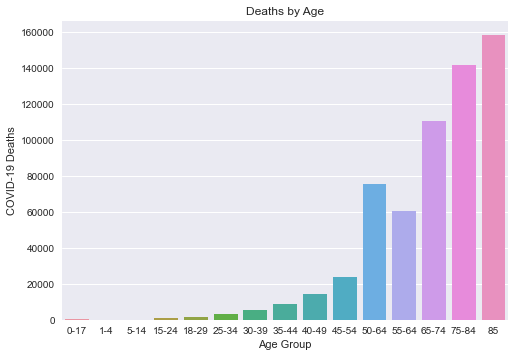

In [7]:
ages_df = df[df['Unnamed: 0'].between(2, 16)]

# Let's take a look!
sns.barplot(data=ages_df, x='Age Group', y='COVID-19 Deaths')
plt.title('Deaths by Age')
plt.xticks(range(len(ages_df['Age Group'])), [g.split(' ')[0] for g in ages_df['Age Group'].unique()]);

Now sexes.

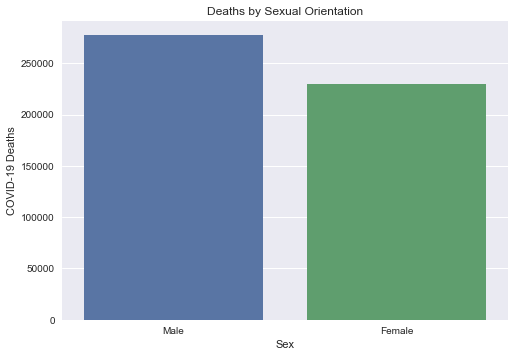

In [8]:
sex_df = df.loc[((df['Age Group'] == 'All Ages') & ((df['Sex'] == 'Male') | (df['Sex'] == 'Female'))) & (df['State'] == 'United States')]
plt.title('Deaths by Sexual Orientation')
sns.barplot(data=sex_df, x='Sex', y='COVID-19 Deaths');

States

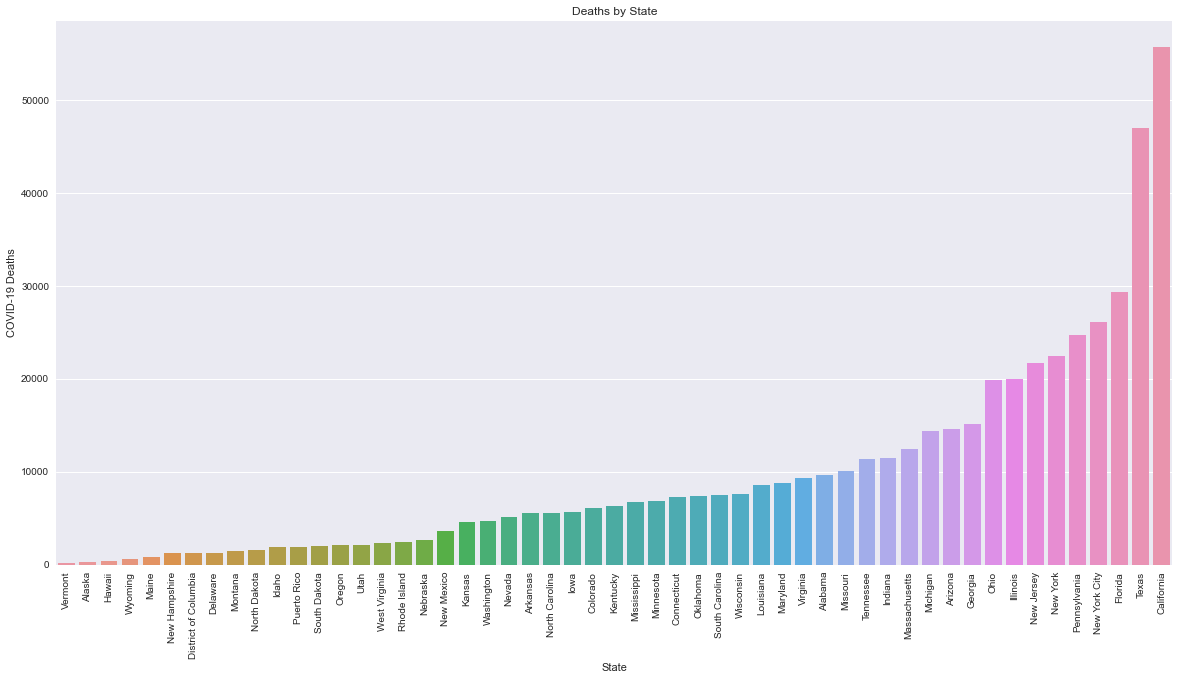

In [9]:
state_df = df.loc[(df['Age Group'] == 'All Ages') & (df['State'] != 'United States') & (df['Sex'] == 'All Sexes')]
state_df = state_df.sort_values(by='COVID-19 Deaths')
plt.figure(figsize=(20, 10))
plt.title('Deaths by State')
sns.barplot(data=state_df, x='State', y='COVID-19 Deaths')
plt.xticks(rotation='vertical');

Let's control by population for that plot.

In [11]:
pop_df = pd.read_csv('../data/state_populations_clean.csv')
pop_df[pop_df['State'] == 'Vermont']['2020'].values[0]
pop_df['2020'].isnull().sum()

0

In [15]:
state_df.sort_values(by='State')
state_df = state_df[(state_df['State'] != 'Puerto Rico') & (state_df['State'] != 'New York City')]
pop_2020 = [pop_df[pop_df['State'] == state]['2020'].values[0] for state in state_df['State']]
state_df['Population 2020'] = pop_2020

51
ipykernel_launcher:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
state_df['Deaths per 1000 People'] = (state_df['COVID-19 Deaths'] / state_df['Population 2020']) * 1000

ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


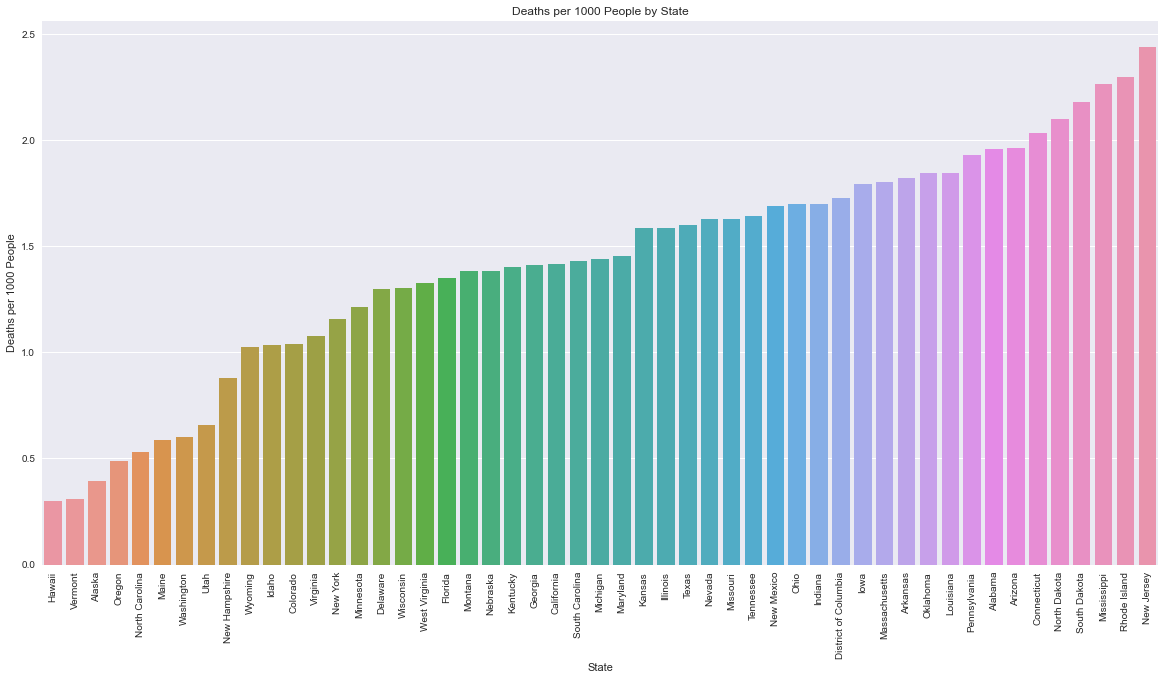

In [21]:
state_df = state_df.sort_values(by='Deaths per 1000 People')
plt.figure(figsize=(20, 10))
sns.barplot(data=state_df, x='State', y='Deaths per 1000 People')
plt.title('Deaths per 1000 People by State')
plt.xticks(rotation='vertical');